In [86]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import visualiser as v
from collections import defaultdict
from scipy.signal import savgol_filter

def __smooth(ys, window=21, poly=5):
    yhat = savgol_filter(ys, window, poly)
    return yhat

def read_data(envs, thread_cnt, opt_batch_sizes):
    total_result = list()
    
    for env_name in envs:
        for opt_batch_size in opt_batch_sizes:
            per_thread_batch_size =  opt_batch_size//thread_cnt
            txt_dir = "txts/" if env_name == "CartPole-v1" else "txts/sample2/"
            # txt_dir = "txts/sample2/"
            print("file:" + txt_dir + env_name + '_rew_hist_'+ str(thread_cnt) +'_'+ str(per_thread_batch_size))
            with open (txt_dir + env_name + '_rew_hist_'+ str(thread_cnt) +'_'+ str(per_thread_batch_size) +'_200.txt', 'rb') as fp:
                means = __smooth(pickle.load(fp))
            with open (txt_dir + env_name + '_rew_std_'+ str(thread_cnt) +'_'+ str(per_thread_batch_size) +'_200.txt', 'rb') as fp:
                stds = __smooth(pickle.load(fp))
            env_df = pd.DataFrame({"env": env_name,
                                   "batch_size": opt_batch_size,
                                   "mean_reward": means, 
                                   "std_reward": stds})
            total_result.append(env_df)
    df = pd.concat(total_result)
    return df

envs = ["Acrobot-v1", "LunarLander-v2", "CartPole-v1"]
threads = [1,2,3,4]
batch_sizes = [1000, 2000,3000]

# fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=[8,8])
# ax1.plot(total_result[0]["mean_reward"] ,label='rewards')
# ax1.set_title("Reward mean")
# ax1.legend()
# ax1.grid()
# ax2.plot(total_result[0]["std_reward"] ,label='std')
# ax2.set_title("Reward std")
# ax2.legend()
# ax2.grid()
# plt.show()



In [87]:
def visualize_data(ax, df, env_names, sample_sizes):
    sns.set(style="darkgrid")
    sub_df = df[df["env"].isin(env_names) & df["batch_size"].isin(sample_sizes)]
    sub_df["batch_size"] = ["$%s$" % x for x in sub_df["batch_size"]]
    #sub_df["batch_size"] = sub_df["batch_size"].astype(str)
    ax = sns.lineplot(x=sub_df.index, y="mean_reward", legend="full", hue="batch_size", style="env", data=sub_df, ax=ax)
    ax.legend(ncol=1, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    ax.set_ylabel("mean reward")
    ax.set_title(env_names[0])
    
    sample_sizes = ["$%s$" % x for x in sample_sizes]
    for env_name in env_names:
        for sample_size in sample_sizes:
            env_sample_sub_df = sub_df[sub_df["env"].eq(env_name) & sub_df["batch_size"].eq(sample_size)]
            ax.fill_between(env_sample_sub_df.index, 
            y1=env_sample_sub_df["mean_reward"] - env_sample_sub_df["std_reward"], 
            y2=env_sample_sub_df["mean_reward"] + env_sample_sub_df["std_reward"], 
            alpha=.4, )          
    return ax

def save_figure_to_svg(fig, dir, filename):
    fig.savefig(dir + filename, format="svg", bbox_inches='tight')

In [90]:
df = read_data(envs, 1, batch_sizes)
print(type(df.iloc[0]["batch_size"]))
print(type(df["batch_size"]))
print(df.info())
print(df["env"].value_counts())
print(df["batch_size"].value_counts())

df.head()

file:txts/sample2/Acrobot-v1_rew_hist_1_1000
file:txts/sample2/Acrobot-v1_rew_hist_1_2000
file:txts/sample2/Acrobot-v1_rew_hist_1_3000
file:txts/sample2/LunarLander-v2_rew_hist_1_1000
file:txts/sample2/LunarLander-v2_rew_hist_1_2000
file:txts/sample2/LunarLander-v2_rew_hist_1_3000
file:txts/CartPole-v1_rew_hist_1_1000
file:txts/CartPole-v1_rew_hist_1_2000
file:txts/CartPole-v1_rew_hist_1_3000
<class 'numpy.int64'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 0 to 399
Data columns (total 4 columns):
env            3600 non-null object
batch_size     3600 non-null int64
mean_reward    3600 non-null float32
std_reward     3600 non-null float32
dtypes: float32(2), int64(1), object(1)
memory usage: 112.5+ KB
None
Acrobot-v1        1200
LunarLander-v2    1200
CartPole-v1       1200
Name: env, dtype: int64
3000    1200
2000    1200
1000    1200
Name: batch_size, dtype: int64


,env,batch_size,mean_reward,std_reward
0,Acrobot-v1,1000,-503.814331,-10.516809
1,Acrobot-v1,1000,-492.520203,15.845600
2,Acrobot-v1,1000,-495.363708,12.231897
3,Acrobot-v1,1000,-503.362671,-2.864505
4,Acrobot-v1,1000,-510.095581,-16.673349


D:\Tools\Python\Anaconda\envs\python_course\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


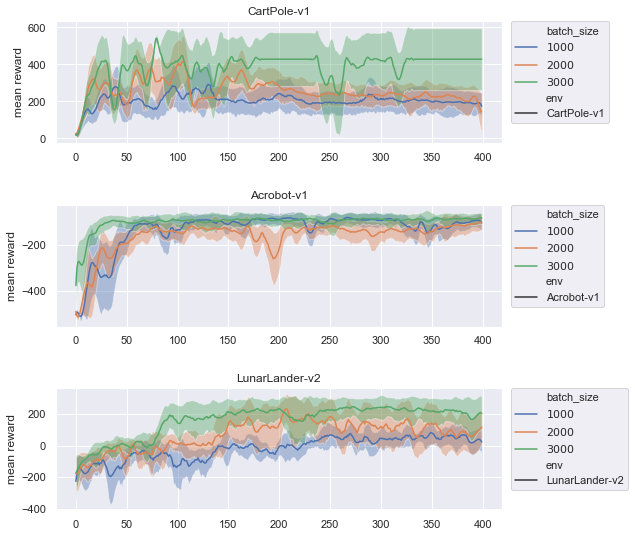

In [91]:
# fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=[8,4])
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=[8,9])


# visualize_data(axs[0], df, ["Acrobot-v1"], [2000])
visualize_data(axs[0], df, ["CartPole-v1"], [1000, 2000, 3000])
visualize_data(axs[1], df, ["Acrobot-v1"],   [1000, 2000, 3000])
visualize_data(axs[2], df, ["LunarLander-v2"],   [1000, 2000, 3000])
# visualize_data(axs[2], df, ["LunarLander-v2"], [2000])
fig.subplots_adjust(hspace=0.5)
save_figure_to_svg(fig, "D://Sandbox/Master_test_results/","ris7.svg")